In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
datos = pd.read_csv('Valhalla23.csv')
datos.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


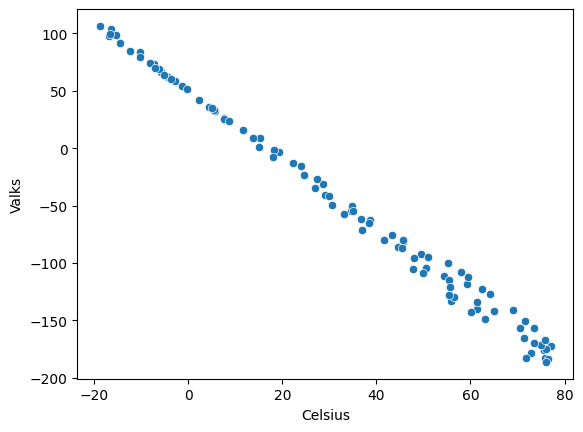

In [12]:
sns.scatterplot(data = datos, x= 'Celsius', y = 'Valks')
plt.show;

In [13]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [60,-10]
theta_nuevo = theta.copy()
# Cargar el valor del learning rate (alpha)
alpha = 0.0001

In [14]:
# Crear función lambda para la función de hipótesis
prediccion = lambda b,m,x: b + m*x

# Calcular el total de muestras a partir de los datos (n)
n = len(datos)

# Separar datos en grupo de entrenamiento y de prueba
np.random.seed(20)

# Revolver el dataframe
datos_revueltos = datos.sample(frac=1).reset_index(drop=True)

# Indice para separar los datos
indice = int(n * 0.7)

# Separar en los dos grupos
training = datos_revueltos[:indice].copy()
test = datos_revueltos[indice:].copy()

In [15]:
i = 1
converge1 = 1
converge2 = 1
n = len(training)
# Se entrena el modelo hasta que los valores de theta converjan o hasta que se alcance el limite de iteraciones
while (converge1 > 1e-6 or converge2 > 1e-6) and i < 1000000:
  i = i + 1
  theta_nuevo[0] = theta[0] - alpha*(1/n)*np.sum(prediccion(theta[0], theta[1], training['Celsius']) - training['Valks'])
  theta_nuevo[1] = theta[1] - alpha*(1/n)*np.sum((prediccion(theta[0], theta[1], training['Celsius']) - training['Valks'])*training['Celsius'])
  converge1 = abs(theta_nuevo[0] - theta[0])
  converge2 = abs(theta_nuevo[1] - theta[1])
  theta = theta_nuevo.copy()

print('Iteraciones:', i)
print('theta0 =', round(theta[0], 2))
print('theta1 =', round(theta[1], 2))

Iteraciones: 148610
theta0 = 49.61
theta1 = -2.96


In [16]:
# Se añade una columna para tener las predicciones
test['Prediccion'] = prediccion(theta[0], theta[1], test['Celsius'])
test.head()


,Celsius,Valks,Prediccion
70,7.6923,26.4480,26.837796
71,14.0390,8.7644,8.047288
72,5.5095,32.1980,33.300355
73,71.3380,-165.4200,-161.596362
74,55.7740,-133.3800,-115.516435


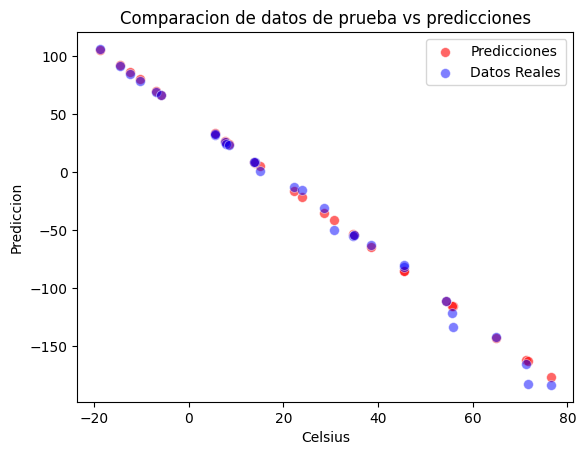

In [17]:
# Comparar los datos de prueba con sus predicciones
sns.scatterplot(data=test, x='Celsius', y='Prediccion', color='red', label='Predicciones', alpha=0.6, s=50)
sns.scatterplot(data=test, x='Celsius', y='Valks', color='blue', label='Datos Reales', alpha=0.5, s=50)
plt.title('Comparacion de datos de prueba vs predicciones')
plt.legend()
plt.show()

In [18]:
# Se utiliza el error cuadratico medio para evaluar el rendimiento del modelo
rmse = np.sqrt((1/n) * np.sum((test['Valks'] - test['Prediccion'])**2))
print('RMSE:', round(rmse,4))

# Se calcula la media 
y_mean = np.mean(test['Valks'])

# Cuadrado de residuos
ss_res = np.sum((test['Valks'] - test['Prediccion'])**2)

# Suma de cuadrados
ss_tot = np.sum((test['Valks'] - y_mean)**2)

# Calcular r2
r_squared = 1 - (ss_res / ss_tot)

print("R^2:", round(r_squared,4))

RMSE: 3.7896
R^2: 0.9952
